In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets

/Users/juliankleindiek/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 5 Deep Learning
This section presents several deep learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

## 5.1 Artificial Neural Networks
- Application: An Artificial Neural Network (also called neural network) is used for non-linear regression and classification tasks
- Description: Inspired by the human brain, neurons are connected in a network structure with a customizable width (number of neurons in a layer) and depth (number of layers)
- Functionality:
    * A **neuron** is a function that maps an input vector to a scalar output via a weight vector, the summation of the input vectors multiplied with the weight vectors, and a nonlinear activation function
    * Randomly initialized weights are updated in the iterative learning process via **forward-** and **backpropagation**:
        * The goal is to find the point where the cost function is the lowest
        * Hence, the backbones of backpropagation are **gradient descent** and the **chain rule**:
            1. Find the sum of inputs multiplied with the randomly initialized weights, $u$
            2. $u$ is the input to the non-linear activiation function
            3. Make a prediction (forward propagation) and claculate the error using a cost function $J$
            4. Take the partial derivatives of $J$ by each parameter of the model (weights, biases, activations), using the chain rule
            5. Gradients for all parameters are multiplied with the learning rate to update the weights; the error is distributed stepwise from the end of the network to its beginning; the weights that contributed to the error the most will be changed the most
            6. Steps 1.-5. are repeated until the minimum of the error function $J$ is found
            ![title](img/backpropagation_algorithm.png)
    * There are different **activation functions**:
        * Step function: Simplest thresholding function, i.e. 0 if $x$ < 0.5 and 1 if $x$ > 0.5
        * Sigmoid: Squashes input space to (0,1); advantage: derivatives are easy to compute; con: tends to vanish gradient (very small updates to weights) because its derivative is a normal distribution whose values are close to 0 most of the time; used for binary classification
        * Tanh: Converges faster than sigmoid due to symmetry around 0
        * ReLU: Converges faster than Tanh or sigmoid, but is non-differentiable in the origin
        * Softplus: Smooth version of ReLU, which is differentiable everywhere
        * Softmax: Converts raw scores into probabilities and is hence used for multiclass classification at the output layer
    * Other design options:
        * Dropout: USed for regularization; randomly drops neurons in each layer so that network is trained on remaining neurons only for one batch; in the next batch neurons are dropped again while assuming the weights that were calculated before they were dropped for the previously dropped neurons
        * Batch normalizeation: Normalize input data for each layer in order to fight the covariance shift (changing distribution of input data due to parameter changes during training), assuring that all input data is in the same range of values; resulting input has zero mean and unit variance; quicker learning and resistance against vanishing gradients
- Limitations: The number of parameters in the network quickly explode for problems such as image recognition; gradients tend to vanish/explode as number of layers increase for some activation functions; require lot of data; prone to overfitting

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [17]:
# load data
iris = load_iris()

# create table
df = pd.DataFrame(data=iris.data)
df.columns = [iris.feature_names]
df['Class'] = iris.target
df['Name'] = iris.target_names[iris.target]

# take features and target
X = iris.data[:, :2]
Y = iris.target

# train/test split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# one hot encoding for categorical data
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(uniques))
y_train_ohe = one_hot_encode_object_array(y_train)
y_test_ohe= one_hot_encode_object_array(y_test)

In [19]:
# build model
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

# show model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [25]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# train model
model.fit(X_train, y_train_ohe, epochs=20, batch_size=1, verbose=2)

Train on 105 samples
Epoch 1/20
105/105 - 0s - loss: 0.0479 - accuracy: 0.9714
Epoch 2/20
105/105 - 0s - loss: 0.0469 - accuracy: 0.9810
Epoch 3/20
105/105 - 0s - loss: 0.0467 - accuracy: 0.9714
Epoch 4/20
105/105 - 0s - loss: 0.0517 - accuracy: 0.9810
Epoch 5/20
105/105 - 0s - loss: 0.0463 - accuracy: 0.9810
Epoch 6/20
105/105 - 0s - loss: 0.0446 - accuracy: 0.9810
Epoch 7/20
105/105 - 0s - loss: 0.0464 - accuracy: 0.9619
Epoch 8/20
105/105 - 0s - loss: 0.0479 - accuracy: 0.9810
Epoch 9/20
105/105 - 0s - loss: 0.0450 - accuracy: 0.9810
Epoch 10/20
105/105 - 0s - loss: 0.0500 - accuracy: 0.9714
Epoch 11/20
105/105 - 0s - loss: 0.0497 - accuracy: 0.9714
Epoch 12/20
105/105 - 0s - loss: 0.0475 - accuracy: 0.9810
Epoch 13/20
105/105 - 0s - loss: 0.0483 - accuracy: 0.9714
Epoch 14/20
105/105 - 0s - loss: 0.0485 - accuracy: 0.9714
Epoch 15/20
105/105 - 0s - loss: 0.0486 - accuracy: 0.9714
Epoch 16/20
105/105 - 0s - loss: 0.0446 - accuracy: 0.9810
Epoch 17/20
105/105 - 0s - loss: 0.0451 - ac

In [26]:
# evaluate model
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.98


## 5.2 Convolutional Neural Network
- Application: Convolutional Neural Networks (CNN) are used for computer vision (i.e. object detection, image classification) and NLP
- Description: In contrast to an ANN, a CNN doesn't have fully connected layers but rather sparse connections via kernels
- Functionality:
    * The key principles are **sparse connections** and **parameter sharing**:
        1. Apply a randomly initialized kernel to input image
        2. Kernel acts as a filter that is convoluted with the input image, resulting in a new output referred to as feature map; a filter can output multiple feature maps called channels depending on the configuration of the network; this step extracts features from the input image
        3. The feature map will serve as input to the next layer, meaning that trasnformed features are carried along in the network
        4. There can be multiple layers of kernels in a CNN that each create their own feature map; the output may shrink and the number of channels may grow as more convolutions are applied to original input
        5. The kernels are trained via feedforward and backpropagation and get better in extracting relevant information from an image
        6. Dense layer with softmax activiation can be used to output probabilities
    * Sparse connections solve the problem of dimensionality for ANNs and the earlier layers preserve spatial information, which is however not maintained throughout the network
    * Stride: Amount of pixels by which the filter shifts; controls how the filter convolves over the original image (i.e. stride of 1, the filter moves around the input image by shifting one unit at a time); controls the size of the resulting image (the higher the stride, the smaller the output)
    * Padding: Add values around the input to have a desired output
    * Pooling: Downsizes feature maps to make computations more efficient; take max/min of subregions; doesn't affect the number of feature maps, but their pixel size 
- Limitations: CNNs do not encode the position and orientation of the object into their predictions; challenge to classify if images are rotated

In [38]:
import keras
import tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [39]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28

# number of classes
num_classes = 10

# define input shape
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalization (255 is max value)
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [40]:
# build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [41]:
# train model
batch_size = 128
epochs = 12
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 117s 2ms/sample - loss: 2.4696 - accuracy: 0.1848 - val_loss: 2.0005 - val_accuracy: 0.4948
Epoch 2/12
60000/60000 [==============================] - 116s 2ms/sample - loss: 1.8689 - accuracy: 0.3617 - val_loss: 1.3938 - val_accuracy: 0.7177
Epoch 3/12
60000/60000 [==============================] - 148s 2ms/sample - loss: 1.5353 - accuracy: 0.4938 - val_loss: 1.0563 - val_accuracy: 0.7981
Epoch 4/12
60000/60000 [==============================] - 121s 2ms/sample - loss: 1.2960 - accuracy: 0.5807 - val_loss: 0.8307 - val_accuracy: 0.8311
Epoch 5/12
60000/60000 [==============================] - 170s 3ms/sample - loss: 1.1176 - accuracy: 0.6425 - val_loss: 0.6797 - val_accuracy: 0.8524
Epoch 6/12
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.9952 - accuracy: 0.6792 - val_loss: 0.5814 - val_accuracy: 0.8678
Epoch 7/12
60000/60000 [==========================

Test loss: [0.3535574447274208, 0.9101]


Text(0.5, 1.0, 'Loss Curves')

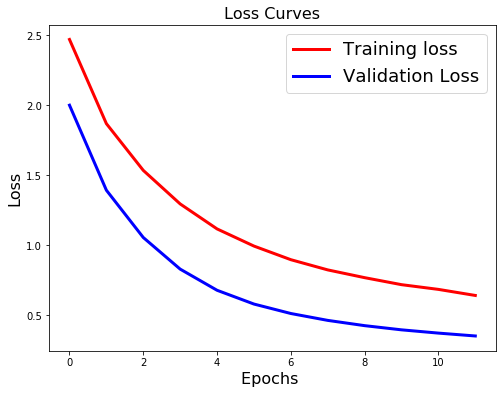

In [42]:
# score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

# loss curve
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## 5.3 Recurrent Neural Network
- Application: Recurrent Neural Networks (RNNs) are used for sequence data that is not i.i.d (i.e. language, finance)
- Description: RNNs have hidden states that are able to keep track of previous events, enabling them to remember things that happened in the past in order to find patterns accross time when making predictions
- Functionality:
    * RNNs are neural networks with loops that take information from previous timesteps and add them to the information of the current timestep
    * Output of RNNs depend on the hidden states produced by previous inputs/timesteps and the current input/timestep
    * Information that is stored in hidden states is called the **memory** of an RNN
    * Training steps:
        1. A single timestep of the input is provided to the RNN
        2. Calculate its current state using the set of current input and the previous state if existing
        3. The current $t$ becomes $t-1$ for the next timestep; you can go as many timesteps according to the problem and join the information from all the previous timesteps
        4. Once all timesteps are completed the final current state is used to calculate the output
        5. Output is then compared to the actual output i.e the target output and the error is calculated
        6. The error is then backpropagated to the network to update the weights and hence the network is trained
    * Similar to CNNs, parameters are shared in an RNN, so it learns by **backpropagation** of errors through all timesteps across the RNN
        * If we calculate the error given our output at each timestep, we need to go back to all prior timesteps in the network that contributed to the calculation of the output of the current timestep (recurrent connections)
        * To minimize the error of the output, we have to update the weights of all recurrent connections
        * If we have multiple timesteps, we have to multiply the weights of the prior timesteps several times, causing **vanishing gradinets**
    * **LSTM** is a special kind of RNN capable of learning long-term dependencies:
        * While LSTMs also have recurrent connections, they introduce gates (forget, input, output gates) that controll the flow of information between the timesteps during forward propagation
        * This means that they manage how much information of the previous timesteps should be passed on to the current timestep
        * In backward propagation, those gates are responsible for controlling the flow of gradients; in that case only the gradients of timesteps that didn't contribute to the output of the current timestep vanish while the other ones don't
        * Hence the flow of gradients in backpropagation is allocated the same as the information flow in forwardpropagation
- Limitations: Vanishing gradients; training an RNN is very difficult

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 
from sklearn.model_selection import train_test_split

In [16]:
# generate data
data = np.array([[[(i+j)/100] for i in range (5)] for j in range(100)], dtype=float)
target = np.array([(i+5)/100 for i in range(100)], dtype=float)

# print data
print("Features: {}", data[0], "Target:", target[0])

# train test split
x_train, x_test, y_train, y_test = train_test_split (data, target, test_size = 0.2, random_state=4)

Features: {} [[0.  ]
 [0.01]
 [0.02]
 [0.03]
 [0.04]] Target: 0.05


In [17]:
# build model (input shape: no batch size (SGD), input sequence is 5 (5 timesteps), size of prediction is 1)
model = Sequential()
model.add(LSTM(units=1, batch_input_shape=(None, 5, 1), return_sequences=True))
model.add(LSTM(units=1, return_sequences=False))

# complie model
model.compile (loss='mean_absolute_error', optimizer ='adam', metrics =['accuracy'])

# print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [18]:
# train
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0)

# predict
results = model.predict(x_test)

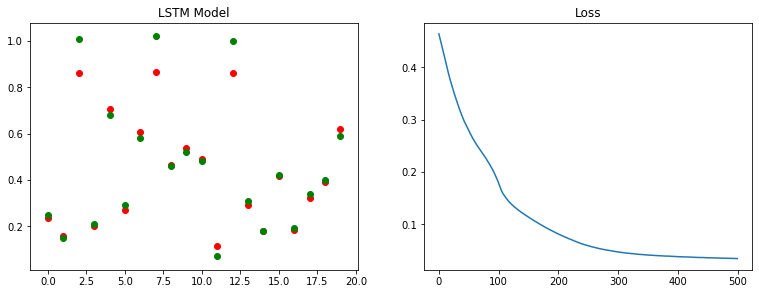

In [19]:
# plot results
fig = plt.figure(figsize=(20,10))

fig.add_subplot(231)
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.title("LSTM Model")

fig.add_subplot(232)
plt.plot(history.history['loss'])
plt.title("Loss")

plt.show()

## 5.4 Autoencoder
- Application: An autoencoder is used for dimension reduction, image processing, and anomaly detection
- Description: An autoencoder is a neural network that learns to copy input to output by training a network that ignores noise
- Functionality:
    * An autoencoder has a hidden layer that describes a code used to represent the input and comprises two parts: Encoder mapping the input into the code, decoder mapping the code to a reconstruction of the original input
    * Copying the input perfectly would just duplicate it, therefore autoencoders usually are restricted in ways that force them to reconstruct the input approximately, preserving only the most relevant aspects of the data
    * Anomaly detection use case:
        * We can either train the model on normal instances only, or on a dataset with low frequency of anomalies (since their contribution to the representation learnt by the model can be neglected)
        * The model is encouraged to learn how to reproduce the most requent characteristics of observations
        * When faced with anomalies, the reproduction performance of the model decreases
        * After training, the model will be able to reconstruct normal data very well, while failing to do so with anomaly data
        * In order to detect anomalies, we calculate the reconstruction error (anomaly scores) of a data point, representing the error between the original data point and its reconstruction by the model
- Limitations: An autoencode is not able to identify which information is relevant because it learns to capture as much information as possible rather than as much relevant information as possible

In [3]:
from pyod.utils.data import generate_data
from pyod.models.auto_encoder import AutoEncoder

Using TensorFlow backend.


/Users/juliankleindiek/anaconda3/lib/python3.7/site-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                275       
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

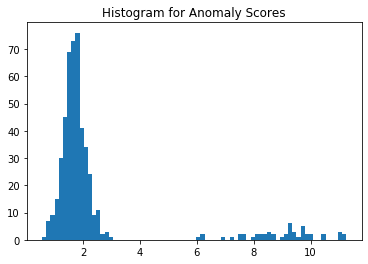

In [4]:
# create data
noise = 0.1
n_train = 500
n_test = 500
n_features = 10
X_train, y_train, X_test, y_test = generate_data(n_train = n_train, n_test = n_test, n_features = n_features, contamination= noise)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# initialize autoencoder (input and output layer has 25 neurons each, there are two hidden layers with each two neurons)
ae = AutoEncoder(hidden_neurons = [25, 2, 2, 25])

# fit autoencoder
ae.fit(X_train)

# find outliers in train data
anomaly_Scores_train = ae.decision_scores_

# apply trained model to predict anomaly score for each observation in test data (high socres relate to low frequence, hence outliers)
anomaly_scores_test = ae.decision_function(X_test)
anomaly_scores_test = pd.Series(anomaly_scores_test)

# plot the result
plt.hist(anomaly_scores_test, bins = 'auto')
plt.title("Histogram for Anomaly Scores")
plt.show()